In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import plotly.express as px

# Read and clean file

In [76]:
df=pd.read_csv('/Users/ludovica/Desktop/Heroic Sante/Full_Question_vaccin_V1.1.csv')


In [79]:
df['Proud_profession_score']=df['Proud_profession'].isin(["D\'accord",'Tout à fait d\'accord']).map({True:"Oui",False:'Non'})

In [ ]:
df['Profession_high_cohesion_feeling']=df['Profession_high_cohesion_feeling'].isin(["D\'accord",'Tout à fait d\'accord']).map({True:"Oui",False:'Non'})

# Hypothesis testing on Proud of Profession/ High Cohesion Feelings

In [81]:
pd.crosstab(df['Did_last_vacc_campaign'],df['Proud_profession_score'],normalize='columns', margins=True)

Proud_profession_score,Non,Oui,All
Did_last_vacc_campaign,,,
Non,0.282016,0.26811,0.271514
Oui,0.717984,0.73189,0.728486


We can see that among all the respondents we have 72.85% did the vaccination. Among respondents, who claimed to be proud of their profession, we have 73.19% being jabbed, while the same parameter is 71.8% for the others

In [83]:
pd.crosstab(df['Did_last_vacc_campaign'],df['Profession_high_cohesion_feeling'],normalize='columns', margins=True)

Profession_high_cohesion_feeling,Non,Oui,All
Did_last_vacc_campaign,,,
Non,0.261187,0.294055,0.271514
Oui,0.738813,0.705945,0.728486


In [84]:
pd.crosstab(df['Did_last_vacc_campaign'],df['Will_vacc_next_campaign'],normalize='columns', margins=True)

Will_vacc_next_campaign,Non,Oui,All
Did_last_vacc_campaign,,,
Oui,1.0,1.0,1.0


In [85]:
prouds = df.query('Proud_profession_score=="Oui"')['Did_last_vacc_campaign'].map({'Oui':1,'Non':0})
nonprouds = df.query('Proud_profession_score=="Non"')['Did_last_vacc_campaign'].map({'Oui':1,'Non':0})

In [86]:
from statsmodels.stats.weightstats import ttest_ind

In [87]:
ttest_ind(prouds,nonprouds)

(0.7360127686851603, 0.46178054635628285, 2996.0)

 Given the pvalue of our test being 0.46, which is much higher then significance level, we conclude that so called 'proudness' of respondents is not a significant factor participation in vaccination campaign. Approx 73% of respondents from both groups participated in irt.

# Hypothesis testing on Professions

In [88]:
masso = df.query('Profession=="Masseur-Kinésithérapeute"')['Did_last_vacc_campaign'].map({'Oui':1,'Non':0})

##### test all professions who didnt do the last vaccin, if they will do the next one

In [89]:
ddf={}
for i,j in df.groupby('Profession'):
    ddf[i]=j.query('Did_last_vacc_campaign=="Non"').Will_vacc_next_campaign_2.map({'Oui':1,'Non':0})
ddf.keys()

dict_keys(['-------------', 'Chirurgien-Dentiste', 'Etudiant', 'Infirmier.e', 'Infirmier.e Libéral.e', 'Masseur-Kinésithérapeute', 'Médecin', 'Orthophoniste', 'Orthoptiste', 'Pharmacien', 'Préparateur en pharmacie', 'Pédicure-Podologue', 'Sage-femme'])

##### Perform Anova test

In [91]:
from scipy.stats import f_oneway


In [92]:
f_oneway(*ddf.values())

F_onewayResult(statistic=2.7028038541492325, pvalue=0.0013878570411094368)

In [94]:
dict(map(lambda x:(x[0],x[1].mean()), ddf.items()))

{'-------------': 0.14285714285714285,
 'Chirurgien-Dentiste': 0.5098039215686274,
 'Etudiant': 0.2,
 'Infirmier.e': 0.5471698113207547,
 'Infirmier.e Libéral.e': 0.4,
 'Masseur-Kinésithérapeute': 0.3114754098360656,
 'Médecin': 0.5217391304347826,
 'Orthophoniste': 0.4157303370786517,
 'Orthoptiste': 0.5194805194805194,
 'Pharmacien': 0.5,
 'Préparateur en pharmacie': 0.2857142857142857,
 'Pédicure-Podologue': 0.2926829268292683,
 'Sage-femme': 0.7}

- Positive Response Rate: on People who didn't do the first vaccine, these are the proportion per category of people    that will do the next one.
- Avg: num(yes)/total responses

In [126]:
dict(map(lambda x:(x[0],x[1].size), ddf.items()))

{'-------------': 7,
 'Chirurgien-Dentiste': 102,
 'Etudiant': 10,
 'Infirmier.e': 53,
 'Infirmier.e Libéral.e': 85,
 'Masseur-Kinésithérapeute': 183,
 'Médecin': 23,
 'Orthophoniste': 178,
 'Orthoptiste': 77,
 'Pharmacien': 38,
 'Préparateur en pharmacie': 7,
 'Pédicure-Podologue': 41,
 'Sage-femme': 10}

Above the sample size per category

##### Results : numyes/total. Among these categories  who didnt do the test last time, Sage-femme , Orthoptiste, 'Médecin' the percentage who are will willing to do it is higher (70%

In [95]:
pd.crosstab(df['Profession'],df['Proud_profession_score'],normalize='index', margins=True)

Proud_profession_score,Non,Oui
Profession,,
-------------,0.187500,0.812500
Chirurgien-Dentiste,0.277904,0.722096
Etudiant,0.400000,0.600000
Infirmier.e,0.165079,0.834921
Infirmier.e Libéral.e,0.321543,0.678457
Masseur-Kinésithérapeute,0.302376,0.697624
Médecin,0.189266,0.810734
Orthophoniste,0.193460,0.806540
Orthoptiste,0.288462,0.711538


# Modeling: Decision Tree for Witty Theory

In [96]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [97]:
df_no = df.loc[df['Did_last_vacc_campaign']=='Non']


In [98]:
df_ml=df_no[['Will_vacc_next_campaign_2','Difference des 2 blocs']]

In [99]:
df_ml=df_no[['Will_vacc_next_campaign_2','Difference des 2 blocs']]
df_ml.reset_index(inplace=True)
df_ml.drop('index',axis=1,inplace=True)
df_ml['Will_vacc_next_campaign_2']=df_ml['Will_vacc_next_campaign_2'].map({'Non':0,'Oui':1})

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-99-2100c89c22a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Will_vacc_next_campaign_2']=df_ml['Will_vacc_next_campaign_2'].map({'Non':0,'Oui':1})


In [100]:
X_train,X_test,y_train,y_test = train_test_split(
df_ml.drop('Will_vacc_next_campaign_2',axis=1),
df_ml['Will_vacc_next_campaign_2'],
test_size=1/3,
random_state=42,
stratify = df_ml['Will_vacc_next_campaign_2']
)

In [101]:
dt=DecisionTreeClassifier(class_weight='balanced')

In [102]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

# Decision Tree Visualizations

In [103]:
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0, min_samples_split=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=10, random_state=0)

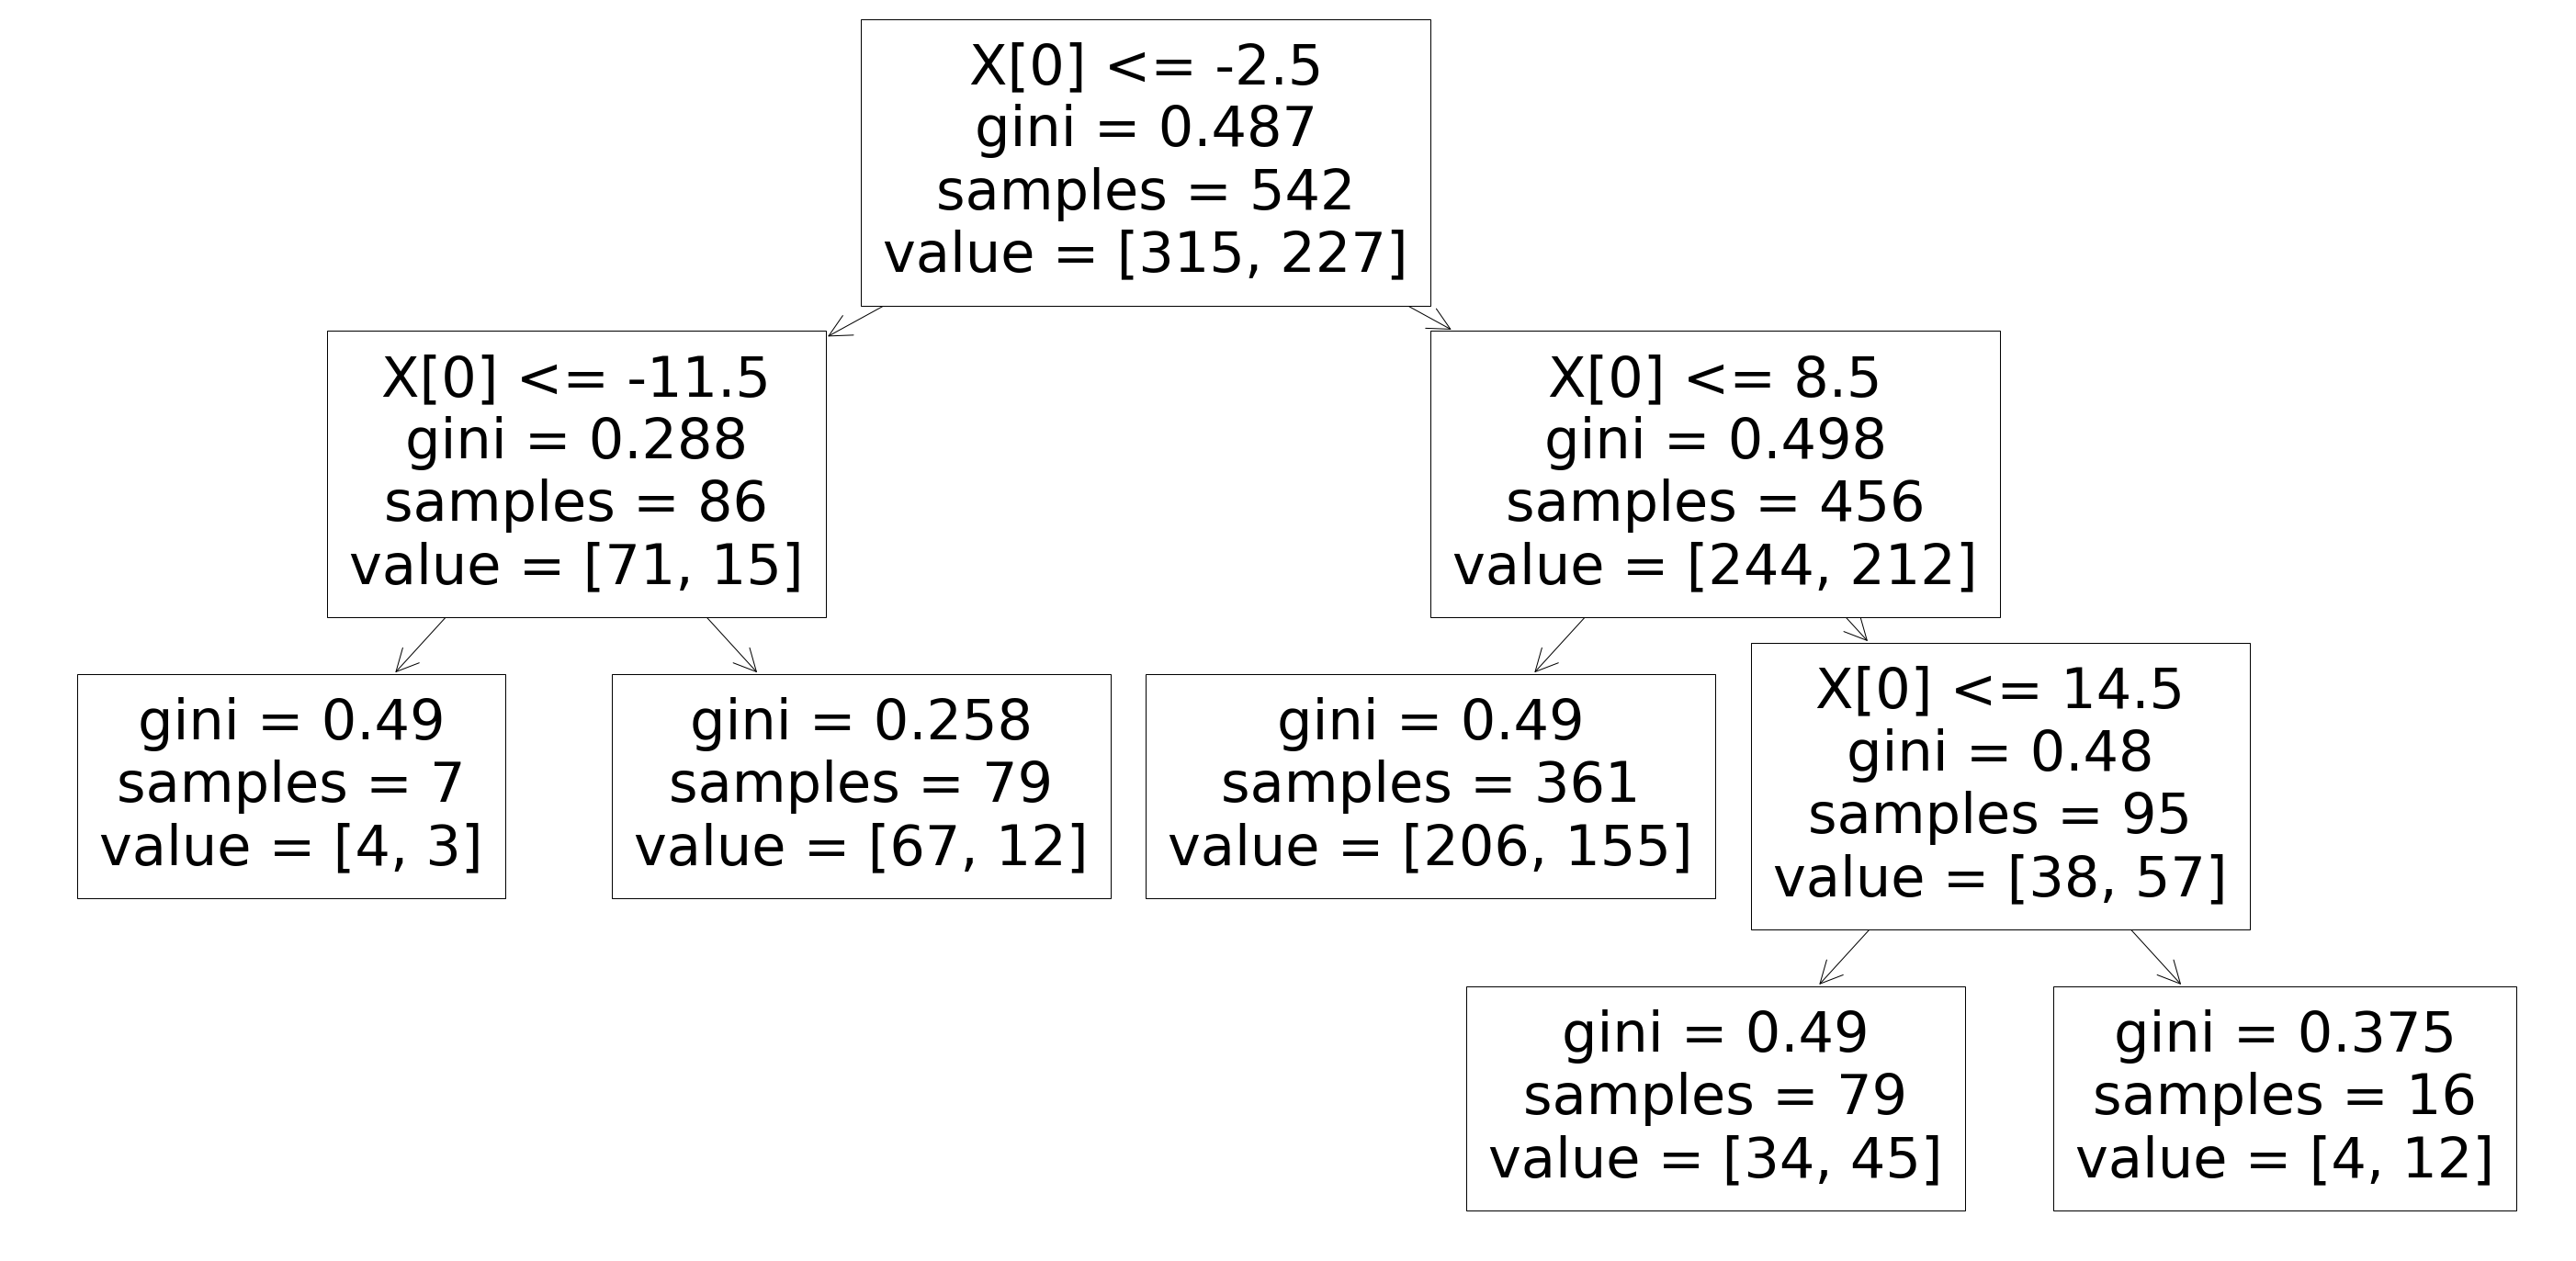

In [104]:
plt.figure(figsize=(50,25))
tree.plot_tree(clf)
plt.show()

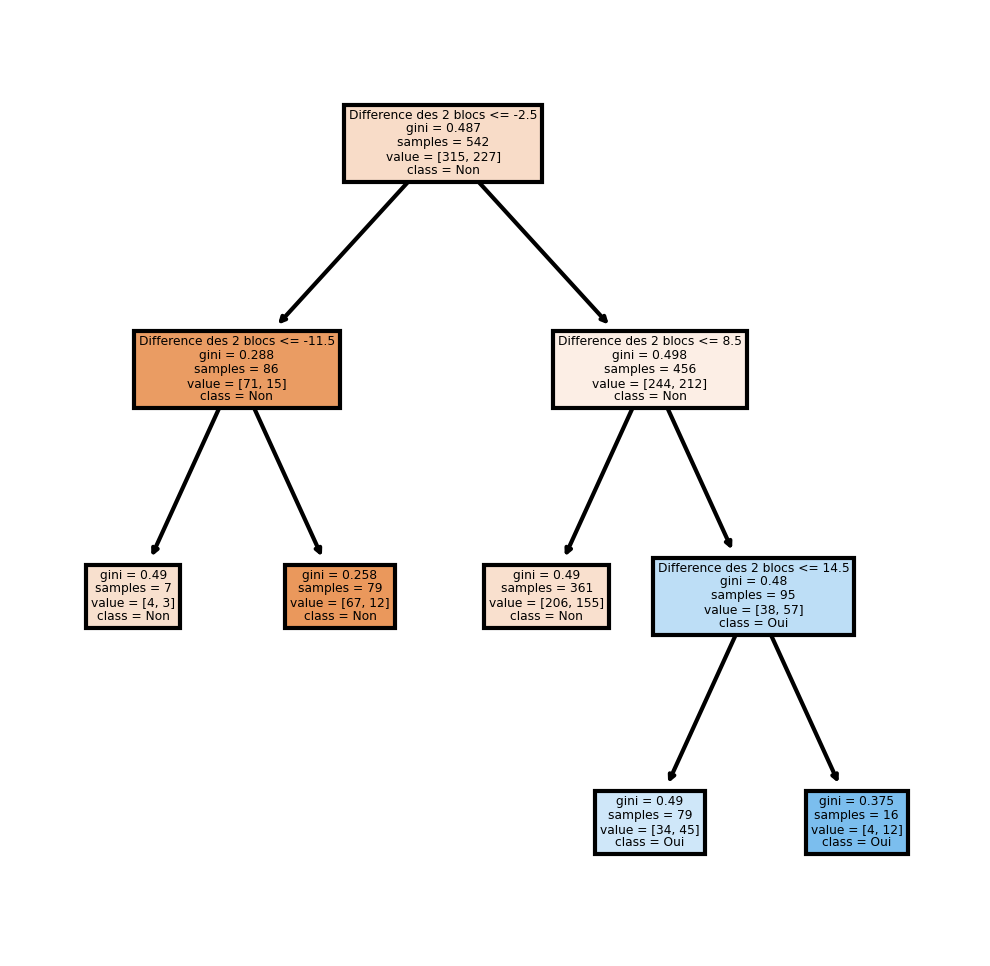

In [105]:
fn=['Difference des 2 blocs']
cn=['Non', 'Oui']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

 Context: based on the 'difference between 2 blocs' (number per person already in the dataset).
          if difference >=1: the person will do next vaccine
    
Decision tree: based on the difference between the blocs --> predict yes or no answer to the question "WIll you do the next vaccine?"

In [106]:
df=pd.read_csv('/Users/ludovica/Desktop/Heroic Sante/Full_Question_vaccin_V1.1.csv')

In [107]:
region = {56 : 'Bretagne', 29 :'Bretagne',35 : 'Bretagne', 22 : 'Bretagne', 75 : 'IDF', 78 : 'IDF', 92 : 'IDF',91:'IDF', 77 : 'IDF', 94 : 'IDF', 95 : 'IDF', 93 :'IDF'}
df['region']= df.Dept.map(region)
df['Age'] = 2020-df['Birth']

In [108]:
def score_cat(score):
    if score<=-11.5:
        return 'below -11.5'
    elif score<=-2.5:
        return '-11.5 to -2.5'
    elif score <=8.5:
        return '-2.5 to 8.5'
    elif score <=14.5:
        return '8.5 to 14.5'
    else:
        return 'above 14.5'

In [109]:
['below -11.5','-11.5 to -2.5','-2.5 to 8.5','8.5 to 14.5','above 14.5']

['below -11.5', '-11.5 to -2.5', '-2.5 to 8.5', '8.5 to 14.5', 'above 14.5']

In [110]:
df['difference des 2 blocs_score']=df['Difference des 2 blocs'].map(score_cat)
df['will_do']=df['Will_vacc_next_campaign_2'].map({'Non':0, 'Oui':1})

In [ ]:
df['difference des 2 blocs_score']=df['Difference des 2 blocs'].map(score_cat)
df['will_do']=df['Will_vacc_next_campaign_2'].map({'Non':0, 'Oui':1})



In [ ]:
df['difference des 2 blocs_score']=df['Difference des 2 blocs'].map(score_cat)
df['will_do']=df['Will_vacc_next_campaign_2'].map({'Non':0, 'Oui':1})

In [ ]:
df.rename(columns={'difference des 2 blocs_score':'score'},inplace=True)
df.columns

Text(0.5, 15.0, '% Yes Respondents')

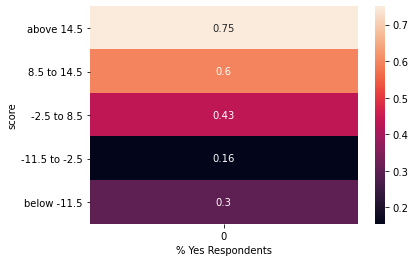

In [114]:
sns.heatmap(df[['score', 'will_do']].groupby('score').apply(lambda x: x.will_do.mean()).loc[['above 14.5','8.5 to 14.5','-2.5 to 8.5','-11.5 to -2.5','below -11.5' ]].to_frame(),annot=True)
plt.xlabel('% Yes Respondents')

Heatmap: the higher the score the higher the % of 'Yes Respondents'. Except in the range -11.5 to -2.5, where % of Yes is lower than the previous one.This can be due to few observations (with more data would be better)

# Inferential Statistic on positive and negative score achiever

In [116]:
negative=df.loc[df['Difference des 2 blocs']<1, 'Will_vacc_next_campaign_2'].map({'Non':0,'Oui':1}).dropna()

In [117]:
positive=df.loc[df['Difference des 2 blocs']>=1, 'Will_vacc_next_campaign_2'].map({'Non':0,'Oui':1}).dropna()

In [118]:
ttest_ind(negative,positive)

(-6.631752320388464, 5.999324992530869e-11, 824.0)

In [ ]:
ttest_ind(negative,positive)

In [119]:
df['score']=df['Difference des 2 blocs'].map(lambda x: 'above 1' if x>=1 else 'below 1' if x<1 else np.nan)
df['answer']=df['Will_vacc_next_campaign_2'].map({'Non':0,'Oui':1})

In [ ]:
df['score']=df['Difference des 2 blocs'].map(lambda x: 'above 1' if x>=1 else 'below 1' if x<1 else np.nan)
df['answer']=df['Will_vacc_next_campaign_2'].map({'Non':0,'Oui':1})

In [120]:
df.groupby('score')['answer'].mean().round(2)

score
above 1    0.50
below 1    0.26
Name: answer, dtype: float64

In [ ]:
df.groupby('score')['answer'].mean().round(2)

Based on descriptive statistic If the score is above 1, probability he will get vaccinated are 51
The higher score the higher the chances.
Since for the other 50% the theory is not confirmed let's go deeper